<a href="https://colab.research.google.com/github/syeong1218/keras-fig/blob/master/Keras_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1장. 케라스를 활용한 고급 딥러닝 소개**

- 학습 목표
  1. 고급 딥러닝 모델을 사용하는데 케라스가 탁월한 도구인 이유를 알아본다.
  2. 이 책에서 사용할 최고급 딥러닝 모델의 기본 구성 요소인 MLP, CNN, RNN을 소개한다.
  3. 예제를 통해 케라스와 텐서플로를 사용해 MLP, CNN, RNN을 구현하는 방법을 보여준다.
  4. 최적화, 정규화, 손실 함수를 포함해 딥러닝의 주요 개념을 소개한다.


### **왜 케라스가 딥러닝 라이브러리로 완벽한가?**

>케라스

- 모델을 효율적으로 구축하고 훈련시킬 수 있게 하는 딥러닝 라이브러리다.<br> 계층이 레고 블록처럼 서로 연결돼 있어 모델을 깔끔하고 이해하기 쉽게 구현할 수 있다. 모델을 훈련시키는 일은 적은 코드로 구현할 수 있는데, 케라스를 사용함으로써 코드 구현 시간을 절약하고 더 나은 딥러닝 알고리즘을 만드는데 생산성을 높일 수 있다.
- 딥러닝 모델을 빠르게 구현하기에 이상적인 도구이다.<br>케라스는 특수한 요구사항을 만족시키기 위해 변경 가능한 API와 Model, Layer 클래스를 사용해 복잡한 모델도 구현할 수 있다. 함수형 API는 그래프와 유사한 모델 작성, 계층 재활용, 파이썬 함수처럼 작동하는 모델을 지원한다. Model, Layer 클래스는 보편적이지 않거나 실험적인 딥러닝 모델과 계층을 구현하기 위한 프레임워크를 제공한다.

  *API는 응용 프로그램 프로그래밍 인터페이스로, 프로그램과 또 다른 프로그램을 연결해주는 일종의 다리역할을 한다.*


### **핵심 딥러닝 모델 구현하기 - MLP, CNN, RNN**

>MLP(다층 퍼셉트론)

- 완전 연결 신경망이다. <br>단순한 로지스틱 회귀와 선형 회귀 문제에 사용된다.<br> 하지만 순차적인 다차원 데이터 패턴을 처리하기에 적합하지 않다. 순차적 데이터의 패턴을 기억할려면 엄청난 노력을 들여야하고, 다차원 데이터를 처리하려면 상당수의 매개변수를 필요로 한다.

>RNN(순환 신경망)

- 예측하는데 필요한 데이터 이력에서 종속성을 발견할 수 있도록 내부적으로 설계되어 있다. <br>순차적 데이터 입력의 경우에 사용된다.

>CNN(합성곱 신경망)

- 이미지와 동영성 같은 다차원 데이터의 경우에 사용된다. <br> 경우에 따라 순차적 입력 데이터를 받는 신경망에서도 사용된다.

전체 심층 신경망을 완성하기 위해서는 **MLP, RNN, CNN, 목적함수나 손실함수, 최적화, 정규화** 방법을 정의해야 한다. <br> 모델을 훈련시킬 때는 손실 함숫값을 줄이는 것을 목표로 하는데, 이 값을 최소화하기 위해서는 최적화 방법을 사용한다. 그리고 정규화는 훈련된 모델을 새로운 데이터에서 활용할 수 있도록 일반화한다.

### **다층 퍼셉트론(MLP)**

>MNIST 데이터세트

- 0부터 9까지 손으로 쓴 숫자를 모아둔 데이터세트이다.<br> 각 숫자에 해당하는 카테고리 혹은 레이블(=타깃=실제 값)로 분류된 이미지로 6만 개 훈련 집합과 1만 개 테스트 집합으로 구성된다.

아래 코드는 MNIST 데이터세트를 로딩하고 임의로 25개의 샘플 이미지를 표시하고 훈련/테스트 데이터세트의 레이블 개수를 세는 방법이다.

In [1]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


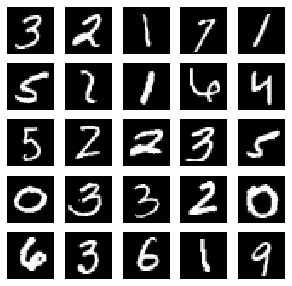

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data() #mnist.load_data() : 7만개 이미지를 모두 로딩해서 각각의 레이블을 달아 배열에 저장할 필요가 없다.

# 고유한 훈련 레이블 개수 세기
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# 고유한 테스트 레이블 개수 세기
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# 훈련 데이터세트에서 25개의 MNIST 숫자 샘플 추출하기
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# 25개의 MNIST 숫자 그리기
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

MNIST 데이터는 2차원 텐서지만 입력 계층의 형식에 따라 형상을 바꿔야 한다.

![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.2.PNG?raw=true)

> MNIST 숫자 분류 모델

- MLP 모델
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.3.PNG?raw=true)

- 퍼셉트론 단위로 표시한 MLP 모델
  
  가중치 $w_i$와 n번째 유닛에 대한 편향 값 $b_n$의 함수로 표현
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.4.PNG?raw=true)



#### **MLP모델을 이용해 케라스에서 MNIST 숫자 분류 모델 구현 코드**

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

# 원-핫 벡터로 변환
# 원-핫 벡터 : 해당 숫자 클래스의 인텍스를 제외하고는 모두 0으로 채워진 10차원 벡터
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 이미지 차원(정사각형으로 가정)
image_size = x_train.shape[1]
input_size = image_size * image_size

# 크기조정, 정규화
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# 신경망 매개변수
batch_size = 128
hidden_units = 256
dropout = 0.45

#모델 : 3개의 계층으로 이루어진 MLP
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# 원-핫 벡터 출력
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# 원-핫 벡터의 손실 함수
# adam 최적화 사용
# 분류 작업의 지표로 정확도를 사용하는 것이 적합함
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 신경망 훈련
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# 일반화가 제대로 됐는지 확인하기 위해 테스트 데이터세트로 모델 검증
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

코드를 하나하나 분석해보면

In [0]:
# 레이블 개수 계산
num_labels = len(np.unique(y_train))

In [0]:
# 원-핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

원-핫 벡터 : 해당 숫자 클래스의 인텍스를 제외하고는 모두 0으로 채워진 10차원 벡터

ex) 레이블이 2라면 원-핫 벡터는 [0,0,1,0,0,0,0,0,0,0]이다.

In [0]:
# 이미지 차원(정사각형으로 가정)
image_size = x_train.shape[1]
input_size = image_size * image_size

# 크기조정, 정규화
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

첫 번째 Dense 계층의 input_size를 계산하고 각 픽셀값을 0 ~ 255 범위에서 0.0~1.0 범위의 값으로 변경한다. 원본 픽셀값을 사용하면 편향 값이 커져서 모델 훈련이 어려워진다.<br> 입력 데이터를 정규화하면 신경망의 출력도 정규화된다. 훈련이 끝나면 출력 텐서에 255를 곱해 원래 픽셀값으로 되돌릴 수 있다.

In [0]:
#모델 : 3개의 계층으로 이루어진 MLP
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# 원-핫 벡터 출력
model.add(Activation('softmax'))

케라스에서 MLP 계층을 Dense라고 한다. <br> 128개 유닛을 사용하면 신경망이 빠르게 수렴하지만 정확도가 낮고, 521개나 1024개 유닛은 정확도가 크게 증가하지 않아 256 유닛을 사용한다. <br> 유닛의 개수는 초매개변수로 신경망의 용량을 제어한다. 용량은 신경망이 근사할 수 있는 함수의 복잡도를 나타내는 지표로 초매개변수가 증가하면 용량도 함께 증가한다.

Dense 계층은 선형 작업이다. <br> 하지만 MNIST 숫자 분류는 비선형으로 Dense 계층 사이에 relu 활성화를 삽입하여 모델링한다. 
- **relu**<br>간단한 비선형 함수이다. 양수 입력값은 변경 없이 통과시키고 나머지는 0으로 고정시킨다. <br> 계산이 간단하기 때문에 효율적이다.
$$relu(x)=max(0,x)$$
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.5.PNG?raw=true)

> 정규화

- **드롭아웃(dropout)**<br>일반적으로 사용하는 정규화 계층이다.<br> dropout이 정해지면 Dropout 계층이 다음 계층으로 연결되는 유닛 중 일부를 제거한다. 여기서 dropout이 0.45니까 첫 번째 계층에서 (1-0.45)$\times $256=140개의 유닛만 두 번째 계층으로 연결된다.<br> Dropout 계층은 일부 유닛이 없어져도 신경망이 올바르게 예측할 수 있게 훈련시키기 때문에 새로운 입력 데이터에도 적용할 수 있도록 만들어준다. <br> 모델을 훈련시킬 때만 사용해야 한다.

> 출력 활성화 함수

- **softmax 활성화 함수** <br> 예측을 정규화해서 출력을 확률로 넣는다. 각 예측값은 인덱스가 해당 입력 이미지의 정확한 레이블일 확률이다. 따라서 전체 출력의 확률을 모두 더하면 1.0이다.
$$softmax(x_i)=\frac{e^{x_i}}{\sum_{j=0}^{N-1}e^{x_j}}$$

- **limear**<br> 선형 활성화는 항등함수로 입력값이 그대로 출력값으로 나온다.

- **sigmoid** <br> 예측 텐서의 요소가 독립적으로 0.0 ~ 1.0 사이의 값으로 매핑될 때 사용된다. softmax와 달리 모든 요소의 합이 1.0이 아니다. 감성 예측이나 이미지생성의 마지막 계층으로 사용된다.

- **tanh** <br> 입력값을 -1.0 ~ 1.0 사이의 값으로 매핑한다. 순환 신경망(RNN)의 내부 계층에 주로 사용되지만, 출력 계층 활성화로 사용되기도 한다. 이 함수를 출력 활성화에 사용하면 사용된 데이터의 척도를 변경해야 한다. $x=\frac{x}{255}가 아니라 $$x=\frac{x-127.5}{127.5}$를 사용해 픽셀값을 [-1.0 1.0]으로 변경한다. 

![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.6.PNG?raw=true)





In [0]:
# 원-핫 벡터의 손실 함수
# adam 최적화 사용
# 분류 작업의 지표로 정확도를 사용하는 것이 적합함
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 신경망 훈련
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0521 - accuracy: 0.9833
Epoch 2/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0528 - accuracy: 0.9830
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0498 - accuracy: 0.9837
Epoch 4/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0489 - accuracy: 0.9843
Epoch 5/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0474 - accuracy: 0.9842
Epoch 6/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0463 - accuracy: 0.9855
Epoch 7/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0453 - accuracy: 0.9850
Epoch 8/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0465 - accuracy: 0.9851
Epoch 9/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0445 - accuracy: 0.9851
Epoch 10/20
60

> 손실 함수

예측된 텐서가 실제 값을 가진 원-핫 벡터와 얼마나 떨어져 있는지를 손실이라 한다. <br> 여기서 사용한 categorical_crossentropy는 목푯값과 예측값의 로그를 곱한 값의 합계에 음의 부호를 취한 값이다. <br> 손실 함수를 임의로 선택해서는 안되며 모델을 학습시킬 때 기준이 되어야 한다. 
```
softmax 활성화 계층 다음에는 categorical_crossentropy 나 mean_squared_error
sigmoid 활성화 계층 다음에는 binary_crossentropy
tanh 출력에는 mean_squared_error
```
를 적용하는 것이 좋다.

> 최적화

최적화는 손실 함수를 최소화하는 것을 목표로 한다. 케라스에서 기본으로 사용하는 지표는 손실(loss)이고, 훈련, 검증 ,테스트하는 동안에는 정확도(accuracy)를 함께 사용한다. 정확도는 실제 값을 기준으로 예측이 차지하는 백분율 또는 분수이다.

- 경사 하강법(GD) : 함수를 따라 내려가면서 최솟값을 구한다.
  ![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.7.PNG?raw=true)

  학습속도가 너무 크면 최솟값 중심으로 앞뒤로 움직이기 때문에 최솟값을 발견할 수 없고, 너무 작으면 최솟값을 구할 때까지 많이 반복해야 한다. 최솟값이 여러 개인 경우 최솟값이 극솟값이 될 수 있다.
  ![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.3.8.PNG?raw=true)

- 확률적 경사 하강법(SGD) : 가장 기본적인 최적화 기법이다. 샘플에서 미니 배치를 선택해 경사의 근삿값을 계산한다. 미니배치 크기는 GPU의 최적화를 위해 2의 제곱 값으로 잡는 것이 좋다.<BR> 도함수를 전파하고 그에 맞춰 경사를 계산하기 위해 역전파를 이용한다.
- 적응 모덴트 추정(Adam) : 적응형 학습 속도를 사용하는 SGD의 변형이다. 여기서는 테스트 정확도가 가장 높아 Adam을 사용한다.
- 제곱 평균 제곱근 편차 전파(RMSprop) : 적응형 학습 속도를 사용하는 SGD의 변형이다.

최적화는 미분을 기반으로 하기 때문에 손실함수의 기준은 미분 가능해야 한다는 것이다.

fit()함수를 사용해 모델을 훈련시킨다. x, y 데이터와 에폭 수, 배치 크기만 정하면 fit()함수가 작업을 모두 수행한다. <br>1 에폭은 훈련시킬 때 사용한 훈련 데이터의 샘플이 전체 훈련 데이터가 되는 것을 뜻한다. batch_size는 각 훈련 단계에서 처리할 입력 데이터 개수를 뜻하는 샘플 크기이다. 

In [0]:
# 일반화가 제대로 됐는지 확인하기 위해 테스트 데이터세트로 모델 검증
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0702 - accuracy: 0.9834

Test accuracy: 98.3%


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

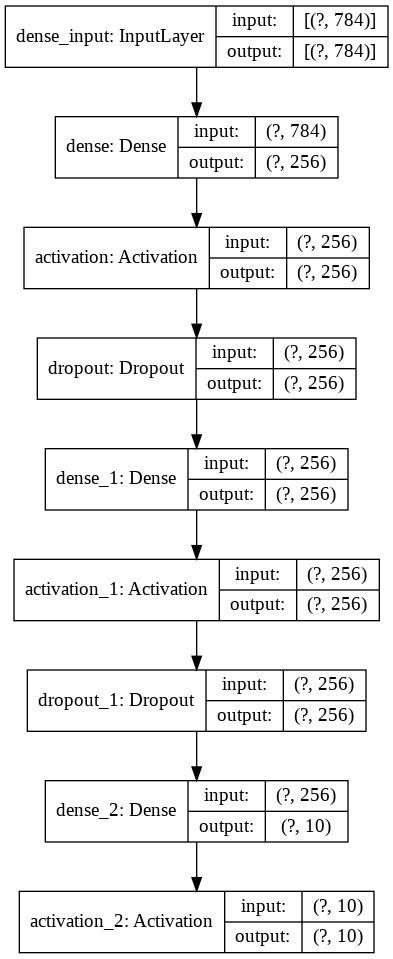

In [0]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

### **합성곱 신경망(CNN)**

- CNN 모델<br>
  MLP 모델과는 달리 MNIST 이미지에 대해 입력 벡터 배신 입력 텐서를 갖는다. 따라서 훈련/데이터 이미지 크기를 재조정해야한다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.4.1.PNG?raw=true)




#### **CNN모델을 이용해 케라스에서 MNIST 숫자 분류 모델 구현 코드**

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

# 원-핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 입력 이미지 차원
image_size = x_train.shape[1]
# 크기 재조정 및 정규화
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 신경망 매개변수
# 이미지는 그대로(정사각형 회색조) 처리됨
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# 모델은 CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# 정규화로 드롭아웃 추가
model.add(Dropout(dropout))
# 출력 계층은 10개 요소로 구성괸 원-핫 벡터
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# 원-핫 벡터를 위한 손실 함수
# adam 최적화 사용
# 분류 작업의 지표로 정확도 사용
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 신경망 훈련
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

코드를 하나하나 분석해보면



In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

# 원-핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

위 코드는 MLP모델과 같다.

In [0]:
# 입력 이미지 차원
image_size = x_train.shape[1]
# 크기 재조정 및 정규화
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# 신경망 매개변수
# 이미지는 그대로(정사각형 회색조) 처리됨
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

입력 이미지를 텐서인 (image_size, image_size, 1)로 재조정한다.

In [0]:
# 모델은 CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# 정규화로 드롭아웃 추가
model.add(Dropout(dropout))
# 출력 계층은 10개 요소로 구성괸 원-핫 벡터
model.add(Dense(num_labels))
model.add(Activation('softmax'))

> 합성곱

Conv2D 계층을 사용한다. relu 활성화 함수는 이미 Conv2D의 인수로 포함되어 있어 따로 입력안해도 된다.
- 커널<br> 전체 이미지를 움직이는 직사각형 패치라고 할 수 있다. 커널은 이미지 경계를 넘어갈 수 없다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.4.2.PNG?raw=true)
- 합성곱<br>  입력 이미지를 커널을 사용해 다른 행렬의 형태로 변형시키는 것이다. 이렇게 변형된 이미지를 특징 맵이라고 한다. 특징 맵은 다음 계층의 또 다른 특징 맵으로 변환된다. Conv2D마다 생성된 특징 맵의 개수는 filters 인수에 의해 제어된다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.4.3.PNG?raw=true) <br> 위 그림은 $5\times 5$ 입력 특징 맵에 $3\times 3$ 커널이 적용된 것을 보여준다. 특징 맵 요소 중 하나의 값에 해당하는 부분을 음영처리했는데, 결과로 얻은 특징 맵을 보면 원래 입력 이미지보다 작다는 것을 알 수 있다. 그 이유는 합성곱이 유효한 요소에 대해서만 수행되기 때문이다. 

> 폴링 연산

MaxPooling2D 계층은 각 특징 맵을 압축한다. 따라서 커널의 적용 범위가 늘어난다. pool_size$\times $pool_size 크기의 패치가 모두 픽셀 하나로 축소된다. 그 값은 패치 내의 최대 픽셀값과 같다. MaxPooling2D의 출력은 특징 맵의 스택이다. Flatten 계층은 특징 맵 스택을 MLP 모델 출력 계층과 유사한 벡터 형식으로 변환한다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.4.4.PNG?raw=true)


In [14]:
# 원-핫 벡터를 위한 손실 함수
# adam 최적화 사용
# 분류 작업의 지표로 정확도 사용
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 신경망 훈련
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0077 - acc: 0.9973
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0050 - acc: 0.9981
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0052 - acc: 0.9983
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0052 - acc: 0.9981
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0054 - acc: 0.9980
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0050 - acc: 0.9982
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0049 - acc: 0.9984
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0043 - acc: 0.9986
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0041 - acc: 0.9985
Epoch 10/10
60000/60000 [==============================] - 

In [15]:
# 일반화가 제대로 됐는지 확인하기 위해 테스트 데이터세트로 모델 검증
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0278 - acc: 0.9944

Test accuracy: 99.4%


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

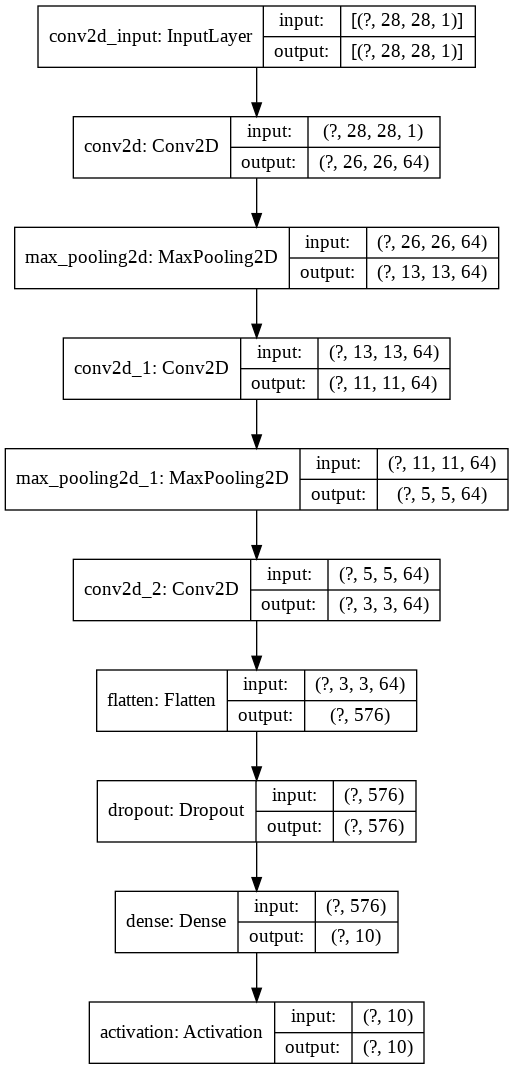

In [17]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

CNN은 MLP보다 매개변수가 더 적어 효율적이며 정확도가 높다. 따라서 CNN은 순차적 데이터, 이미지, 동영상을 학습하기에 적합하다.

### **순환 신경망(RNN)**

- RNN<br> 자연어 처리에서 텍스트나 기기 장치의 센서 데이터스트림 같은 순차적 데이터의 표현을 학습하기에 적합한 신경망이다. 
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.5.1.PNG?raw=true)

#### **RNN모델을 이용해 케라스에서 MNIST 숫자 분류 모델 구현 코드**

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

# 원-핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 크기 재조정 및 정규화
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 신경망 매개변수
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# 모델 : 256개 유닛으로 구성된 RNN
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# 원-핫 벡터를 위한 손실 함수
# SGD 최적화 사용
# 분류 작업에 대한 지표로 정확도 사용
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# 신경망 훈련
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

코드 분석하면

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

# 원-핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 크기 재조정 및 정규화
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# 신경망 매개변수
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

입력 이미지를 (image_size, image_size)인 벡터의 시퀀스로 처리한다.

input_shape = (image_size, image_size)는 실제로 input_shape = (timesteps, image_dim)인 timesteps 길이의 차원벡터이다.

In [0]:
# 모델 : 256개 유닛으로 구성된 RNN
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

RNN 셀을 표현하기 위해 units=256으로 된 SimpleRNN 계층을 사용한다.

RNN의 출력은 현재 입력뿐만 아니라 이전 출력이나 은닉 상태로 구성된 함수이다. 

- SimpleRNN과 RNN<br> SimpleRNN은 소프트맥스 계산 전에 $O_t=Vh_t+c$ 출력값이 없기 때문이다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.5.2.PNG?raw=true)

In [12]:
# 원-핫 벡터를 위한 손실 함수
# SGD 최적화 사용
# 분류 작업에 대한 지표로 정확도 사용
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# 신경망 훈련
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0864 - acc: 0.9737
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0829 - acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0838 - acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0800 - acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0757 - acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0752 - acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0758 - acc: 0.9766
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0735 - acc: 0.9774
Epoch 9/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0717 - acc: 0.9785
Epoch 10/20
60000/60000 [==============================] - 

In [14]:
# 일반화가 제대로 됐는지 확인하기 위해 테스트 데이터세트로 모델 검증
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0485 - acc: 0.9853

Test accuracy: 98.5%


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


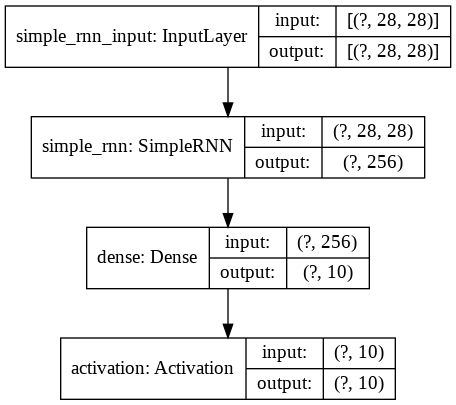

In [9]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

> 장단기 메모리(LSTM) 신경망

장기 종속성 문제를 해결하거나 현재 출력과 관련된 과거 정보를 기억한다.
![대체 텍스트](https://github.com/syeong1218/keras-fig/blob/master/1.5.4.PNG?raw=true)
LSTM은 현재 입력과 과거 출력, 혹은 은닉 상태만 사용하는 것이 아니라 하나의 셀에서 다른 셀로 정보를 옮기는 셀 상태인 $s_t$ 를 사용한다. 셀 상태 사이의 정보 흐름은 $f_t, i_T, q_t$에 의해 제어된다. 

> 게이트 순환 유닛(GRU)

셀 상태와 은닉 상태를 결합해 LSTM을 단순화한다.

> 양방향 RNN 

패러 함수를 사용함으로써 양방향 RNN으로 만들 수 있다. 양방향 RNN은 정보를 뒤로 흐르게 함으로써 미래 상태가 현재 상태와 과거 상태에도 영향을 미칠 수 있다. 

모든 RNN은 유닛 수를 증가시키거나 RNN 계층을 연결하면 용량이 증가한다. 용량을 과도하게 증가시키면 모델이 과적합될 위험이 있고, 그 결과 예측하는 동안 훈련 시간이 길어지고 성능이 느려진다.